# Position probabilities

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from bounded_rand_walkers.cpp import bound_map
from bounded_rand_walkers.functions import Freehand, Gaussian
from bounded_rand_walkers.position_density import g1D, g2D

mpl.rc_file("matplotlibrc")

### Calculated 1D probabilities

/home/alexander/Documents/other/bounded-rand-walkers/src/bounded_rand_walkers/position_density.py:41: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  num[i] = integrate.quad(lambda x: f(np.array([x])), -x, 1 - x)[0]


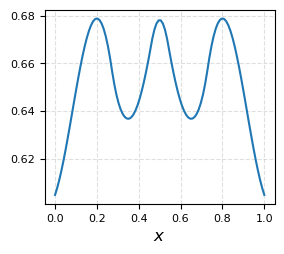

In [2]:
xs = np.linspace(0, 1, 100)
plt.plot(xs, g1D(Freehand(width=2.0), xs))
_ = plt.xlabel(r"$x$")

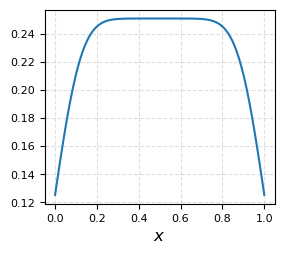

In [3]:
xs = np.linspace(0, 1, 100)
plt.plot(xs, g1D(Gaussian(width=0.1), xs))
_ = plt.xlabel(r"$x$")

### Calculated 2D probabilities


CPU times: user 1.53 s, sys: 109 ms, total: 1.64 s
Wall time: 1.56 s


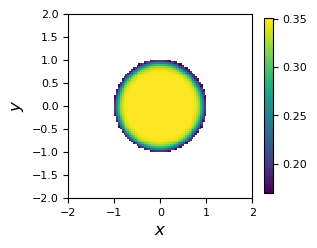

In [4]:
%%time
N = 100
x = y = np.linspace(-2, 2, N)

pos_prob = g2D(
    Gaussian(centre=np.array([0.0, 0.0]), width=0.1), x, y, bound_map["circle"]()
)
# Mask the area close to 0 to pronounce variability within the boundary.
pos_prob = np.ma.MaskedArray(pos_prob, mask=np.isclose(pos_prob, 0))

plt.pcolormesh(
    x,
    y,
    pos_prob,
)
plt.axis("square")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
_ = plt.colorbar(shrink=0.9)


CPU times: user 3.47 s, sys: 91.7 ms, total: 3.56 s
Wall time: 3.45 s


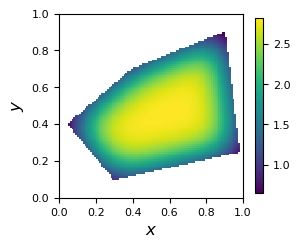

In [5]:
%%time
N = 100
x = y = np.linspace(0, 1, N)

pos_prob = g2D(
    Gaussian(centre=np.array([0.0, 0.0]), width=0.1), x, y, bound_map["irregular"]()
)
# Mask the area close to 0 to pronounce variability within the boundary.
pos_prob = np.ma.MaskedArray(pos_prob, mask=np.isclose(pos_prob, 0))

plt.pcolormesh(
    x,
    y,
    pos_prob,
)
plt.axis("square")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
_ = plt.colorbar(shrink=0.9)


CPU times: user 15.5 s, sys: 123 ms, total: 15.6 s
Wall time: 15.4 s


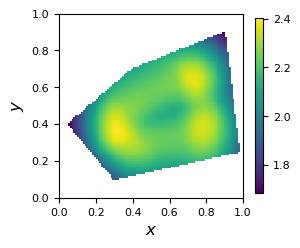

In [6]:
%%time
N = 100
x = y = np.linspace(0, 1, N)

pos_prob = g2D(Freehand(), x, y, bound_map["irregular"]())
# Mask the area close to 0 to pronounce variability within the boundary.
pos_prob = np.ma.MaskedArray(pos_prob, mask=np.isclose(pos_prob, 0))

plt.pcolormesh(x, y, pos_prob)
plt.axis("square")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
_ = plt.colorbar(shrink=0.9)